# <원래 올렸던 코드에서 추가적으로 구한 것들>

In [2]:
import pandas as pd

# 그래프, 한글 설정
# 출처 : https://wikidocs.net/4767
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 칼럼이름, 값이름 변경한 csv 파일 가져옴
# EUC-KR 은 KS X 1001와 KS X 1003을 사용하는 8비트 문자 인코딩, EUC의 일종이며 대표적인 한글 완성형 인코딩임
# 해당 파일 오류가 나서 euc-kr로 설정
shopping = pd.read_csv('new_shopping.csv', encoding = 'euc-kr')
notshopping = pd.read_csv('new_notshopping.csv', encoding = 'euc-kr')

In [3]:
# 남자만
male = shopping[shopping['성별'] == 1]
n_male = notshopping[notshopping['성별'] == 1]

#여자만
female = shopping[shopping['성별'] == 2]
n_female = notshopping[notshopping['성별'] == 2]

In [9]:
# 총이용횟수 구하기위해서는 영수증 똑같은 번호 중복삭제
df = shopping.drop_duplicates(['영수증번호'], keep='first')
df_m = male.drop_duplicates(['영수증번호'], keep='first')
df_f = female.drop_duplicates(['영수증번호'], keep='first')

## shopping - 업종 영수증 번호 중복삭제 후 다시 구해봄

In [12]:
def count(gender_age, criteria):
    return gender_age[criteria].value_counts()

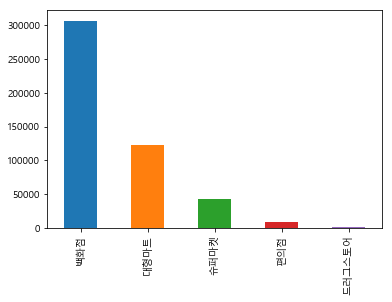

In [19]:
count(df, '업종').plot(kind='bar')

## ID와 업종별로 그룹화 ->  고객별 업종 이용횟수와 총구매액
### 1. shopping

In [11]:
# ID와 업종별로 그룹화
df = df.groupby(['ID', '업종'])

# 필요한 컬럼만 선택
df = df['업종', '구매금액']

# 총구매금액 구하기위한 df
df_sum = df.sum()

# 업종 이용횟수 구하기위한 df
df_biz = df.count()

# 필요없는 컬럼 삭제
df_biz = df_biz.drop(columns='구매금액')

# ID별로 그룹화하여 각 고객별 어떤 업종 몇번 이용했는지, 그 업종에 대해 총구매액은 얼마인지
id_biz = pd.concat([df_biz, df_sum], axis = 1)

# 업종 이용횟수를 나타내는 컬럼이름으로 변경
id_biz = id_biz.rename(columns={'업종':'업종이용횟수'})

In [12]:
id_biz

업종이용횟수     구매금액
ID    업종                   
1     대형마트       1    72000
      백화점       42  2709940
2     대형마트      49   652680
      백화점        5   189900
3     대형마트      10    84980
      백화점       19   951900
      슈퍼마켓       3     9590
4     대형마트      60  1075890
      백화점       60  4053610
      편의점        2    11100
6     대형마트     158  1843480
      백화점        4   161500
      슈퍼마켓      68   256226
      편의점       49   113800
7     대형마트       3    19780
      백화점       47  1842800
8     대형마트      14   257530
      백화점       45  2862970
9     백화점       69  7245590
      슈퍼마켓       3    13550
10    백화점       11   320100
11    대형마트       2    90620
      백화점       14  1877800
      슈퍼마켓       2     5980
13    백화점        8   451600
14    백화점       25   939100
15    대형마트       3    96000
      백화점       45  4366790
      슈퍼마켓       6    41220
16    대형마트     122  1133326
...            ...      ...
19852 백화점       18   239330
19856 백화점       65  2247130
19858 백화점        1    32000
19859 백화점        1    12900
19869 백화점        9   487800
19876 백화점        1    24900
19878 백화점        1    10900
19883 백화점        6    96000
19889 백화점        1    59800
19902 백화점        2    80300
19904 백화점        3    35060
19907 백화점        1   198000
19908 백화점        1    20000
19909 백화점        1    39900
19923 백화점        2    27000
19926 백화점        3    35750
19929 백화점        2     6700
19930 백화점        3   168000
19932 백화점        2   303000
19936 백화점        3  1578000
19941 백화점        2    32500
19950 백화점       10   156000
19952 백화점        6   806300
19953 백화점        1    59000
19961 백화점        1    34900
19975 백화점        1   275000
19979 백화점        2    85700
19981 백화점        1     4990
19992 백화점        1    10000
20000 백화점        1    69000

[29928 rows x 2 columns]

In [33]:
id_biz.to_csv("id_biz.csv", encoding='ms949')

In [22]:
# 총 구매액 높은 고객 순서
id_biz.sort_values(by='구매금액', ascending=False)

,,업종이용횟수,구매금액
ID,업종,,
13087,백화점,32,224753010
7039,백화점,176,210237590
11447,백화점,22,161401000
2807,백화점,55,143372960
7278,백화점,71,127334160
6663,백화점,120,105005570
9038,백화점,60,94357880
3015,슈퍼마켓,75,85586100
2363,백화점,72,77888750


In [23]:
# 업종 이용횟수 높은 고객 순서
id_biz.sort_values(by='업종이용횟수', ascending=False)

,,업종이용횟수,구매금액
ID,업종,,
327,슈퍼마켓,365,4254033
1715,대형마트,348,2839129
617,백화점,337,11201570
178,백화점,307,7211720
756,슈퍼마켓,306,2081435
2514,백화점,295,14024140
611,백화점,286,11282160
1325,백화점,286,20949230
1809,백화점,284,51828930


### 2. notshopping

In [20]:
# ID와 업종별로 그룹화
n_df = notshopping.groupby(['ID', '업종'])

# 필요한 컬럼만 선택
n_df = n_df['업종', '이용금액']

# 총구매금액 구하기위한 df
n_df_sum = n_df.sum()

# 업종 이용횟수 구하기위한 df
n_df_biz = n_df.count()

# 필요없는 컬럼 삭제
n_df_biz = n_df_biz.drop(columns='이용금액')

# ID별로 그룹화하여 각 고객별 어떤 업종 몇번 이용했는지, 그 업종에 대해 총구매액은 얼마인지
n_id_biz = pd.concat([n_df_biz, n_df_sum], axis = 1)

# 업종 이용횟수를 나타내는 컬럼이름으로 변경
n_id_biz = n_id_biz.rename(columns={'업종':'업종이용횟수'})

In [21]:
n_id_biz

업종이용횟수    이용금액
ID    업종                   
1     면세점         4  948848
      영화관         2   21500
      카페          3   29400
      테마파크        1   58000
2     면세점         1  195353
      카페          3   25300
      패스트푸드       1    7400
3     면세점         1  569683
      카페          2   18300
4     면세점         2  238203
      영화관         2   51000
      카페          1    9200
      테마파크        2   32200
      패스트푸드       8   90500
5     면세점         1  708645
6     영화관         2   20000
      카페          2   28200
      테마파크        1   93100
      패스트푸드      11  343400
7     영화관         4   50000
      카페          3   57600
      테마파크        1   13800
      패스트푸드       2    4400
8     면세점         1  149838
      영화관         2   39500
      카페          5  148600
      테마파크        1   52700
      패스트푸드       6  141100
9     면세점         1  176672
      카페          2   23300
...             ...     ...
19937 면세점         1   29865
19938 영화관         1    8000
19941 테마파크        2   81900
19942 영화관         2  118000
19944 면세점         1  152013
19952 카페          2   31400
19954 패스트푸드       3   26900
19958 면세점         1  173838
19961 패스트푸드       1   11400
19962 면세점         1   70568
19967 영화관         1   18000
19969 패스트푸드       1   27800
19971 면세점         1  753855
19972 면세점         1   75958
19974 영화관         1   55000
19976 테마파크        1   17100
19977 면세점         1  217191
19978 면세점         2  167995
19979 면세점         1  244475
      카페          1   19000
19980 면세점         1  112573
19981 카페          1    8200
19986 면세점         1  115532
      테마파크        1   89600
19987 영화관         2   34000
19991 면세점         1  154153
19992 패스트푸드       1    1500
19993 면세점         1   50956
19994 면세점         1  161593
19995 테마파크        1  133800

[55537 rows x 2 columns]

In [22]:
n_id_biz.to_csv("n_id_biz.csv", encoding='ms949')

In [23]:
# 총 구매액 높은 고객 순서
n_id_biz.sort_values(by='이용금액', ascending=False)

,,업종이용횟수,이용금액
ID,업종,,
16002,면세점,12,358939042
6531,호텔,11,158390500
6207,호텔,13,143470090
1522,호텔,8,76893497
291,면세점,12,65002927
14858,호텔,12,56635200
1497,호텔,5,50524325
13014,호텔,5,45173600
483,면세점,7,43693810


In [24]:
# 업종 이용횟수 높은 고객 순서
n_id_biz.sort_values(by='업종이용횟수', ascending=False)

,,업종이용횟수,이용금액
ID,업종,,
6693,영화관,24,903500
5663,영화관,23,834000
466,영화관,23,747800
2086,영화관,22,554700
1559,영화관,22,447500
9421,영화관,22,830500
15033,영화관,22,579000
7849,영화관,22,362500
14811,영화관,22,1361000
